In [1]:
#install and download needed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, StackingRegressor,BaggingRegressor,GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,KFold
from sklearn.metrics import mean_squared_error,accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('cocacola.csv')

In [3]:
data.shape 

(7551, 7)

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1994-02-25,10.50000,10.59375,10.46875,10.50000,5.055296,5167600
1,1994-02-28,10.53125,10.81250,10.53125,10.65625,5.130524,6970400
2,1994-03-01,10.65625,10.71875,10.53125,10.59375,5.100432,6560400
3,1994-03-02,10.59375,10.59375,10.46875,10.53125,5.070341,6402400
4,1994-03-03,10.53125,10.53125,10.37500,10.40625,5.010159,4341600


In [5]:
data.index 

RangeIndex(start=0, stop=7551, step=1)

In [6]:
data=data.rename(columns={'Date':'date','Open':'open','High':'high','Low':'low','Close':'close','Volume':'volume'})

In [7]:
data=data.drop(columns=['Adj Close'],axis=1)

In [8]:
data['date']=pd.to_datetime(data['date'])

In [9]:
data.set_index('date', inplace=True)

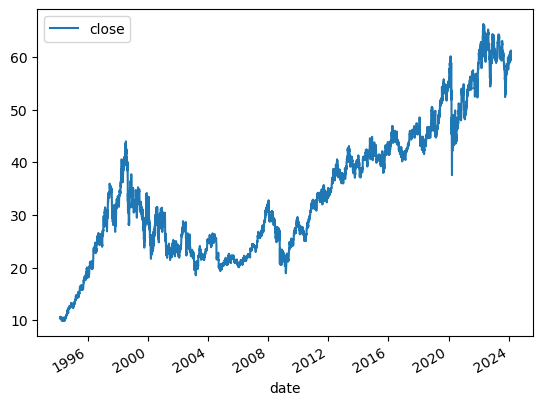

In [10]:
data.plot.line(y='close', use_index=True)
plt.savefig('cocacola.png');

In [11]:
data.describe()

,open,high,low,close,volume
count,7551.000000,7551.000000,7551.000000,7551.000000,7.551000e+03
mean,34.300110,34.573539,34.019035,34.307452,1.324274e+07
std,12.942850,13.006422,12.872733,12.938067,7.455999e+06
min,9.843750,9.875000,9.718750,9.843750,9.720000e+05
25%,23.852500,24.092500,23.595000,23.894999,8.402700e+06
50%,31.540001,31.875000,31.270000,31.531250,1.179970e+07
75%,42.990000,43.398125,42.709999,43.070000,1.612745e+07
max,67.000000,67.199997,65.720001,66.209999,1.241690e+08


In [11]:
data['Tomorrow']=data['close'].shift(-1)

In [12]:
data['previousday']=data['close'].shift(1)

In [13]:
data.head() 

,open,high,low,close,volume,Tomorrow,previousday
date,,,,,,,
1994-02-25,10.50000,10.59375,10.46875,10.50000,5167600,10.65625,NaN
1994-02-28,10.53125,10.81250,10.53125,10.65625,6970400,10.59375,10.50000
1994-03-01,10.65625,10.71875,10.53125,10.59375,6560400,10.53125,10.65625
1994-03-02,10.59375,10.59375,10.46875,10.53125,6402400,10.40625,10.59375
1994-03-03,10.53125,10.53125,10.37500,10.40625,4341600,10.40625,10.53125


In [14]:
train = data.iloc[:-1000]
test = data.iloc[-1000:]

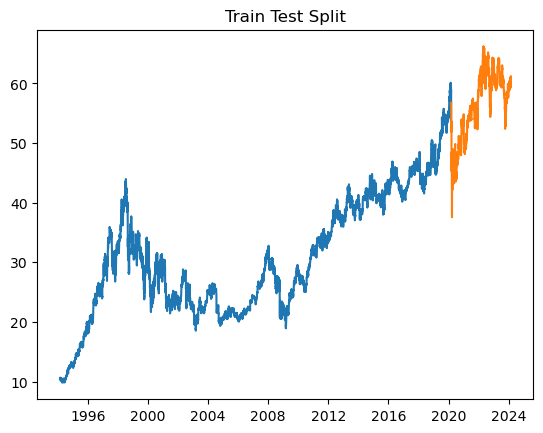

In [15]:
import matplotlib.pyplot as plt 
plt.plot(train['close'], label='train')
plt.plot(test['close'], label='test')
plt.title('Train Test Split');

In [16]:
# Utility function
def evaluate_model(model, x, y):
    """
    Utility function to print the model performance, (MAE and MAPE)
    model: Fitted model
    x:  features dataset
    y:  target values
    """
    predicted = model.predict(x) #get predictions
    mae = mean_absolute_error(y_true=y, y_pred=predicted)
    abs_errors= np.abs(np.array(predicted) - np.array(y))
    min_abs_errors= np.min(abs_errors)
    max_abs_errors= np.max(abs_errors)
    med_abs_errors= np.median(abs_errors)
    mape = mean_absolute_percentage_error(y, predicted)

    print('MAE: {:.2f}'.format(mae))
    print('MAPE: {:.2f}'.format(mape))
    print('minae: {:.2f}'.format(min_abs_errors))
    print('maxae: {:.2f}'.format(max_abs_errors))
    print('medae: {:.2f}'.format(med_abs_errors))
    print()

In [17]:
#predictors_1 = ["close", "volume", "open", "high", "low"]
predictors_2 = ["volume", "open", "high", "low"]

In [18]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on  test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors_2], train['close'])
    print(f'Performance of "{key}" on Validation and Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors_2], test['close'])





Performance of "RF Regressor" on Validation and Test set:
Test set:
****************
MAE: 0.99
MAPE: 0.02
minae: 0.00
maxae: 6.43
medae: 0.34

Performance of "xgboost" on Validation and Test set:
Test set:
****************
MAE: 1.01
MAPE: 0.02
minae: 0.00
maxae: 6.42
medae: 0.38

Performance of "Gradient Boost" on Validation and Test set:
Test set:
****************
MAE: 1.01
MAPE: 0.02
minae: 0.00
maxae: 6.39
medae: 0.40

Learning rate set to 0.358225
0:	learn: 6.7769273	total: 140ms	remaining: 13.9s
1:	learn: 4.5259114	total: 143ms	remaining: 7.01s
2:	learn: 3.1014723	total: 147ms	remaining: 4.74s
3:	learn: 2.1291128	total: 150ms	remaining: 3.6s
4:	learn: 1.5070940	total: 154ms	remaining: 2.92s
5:	learn: 1.1252587	total: 156ms	remaining: 2.45s
6:	learn: 0.8969415	total: 158ms	remaining: 2.1s
7:	learn: 0.7654509	total: 160ms	remaining: 1.84s
8:	learn: 0.6946999	total: 164ms	remaining: 1.65s
9:	learn: 0.6494671	total: 166ms	remaining: 1.5s
10:	learn: 0.6151744	total: 169ms	remaining: 1.

#### Retrain the best Model(Extreme Gradient Boosting)

In [19]:
model= GradientBoostingRegressor()
model.fit(train[predictors_2], train['close'])
pred= model.predict(test[predictors_2])

In [20]:

pred= pd.Series(pred, index=test.index)
combined_2= pd.concat([test['close'], pred],axis=1)

In [21]:
#combined_1.plot();
combined_2

,close,0
date,,
2020-03-05,56.740002,56.588107
2020-03-06,55.259998,55.189297
2020-03-09,51.860001,53.383827
2020-03-10,53.660000,52.545542
2020-03-11,52.209999,51.094016
...,...,...
2024-02-16,59.389999,59.318949
2024-02-20,60.700001,59.834807
2024-02-21,61.240002,59.824960


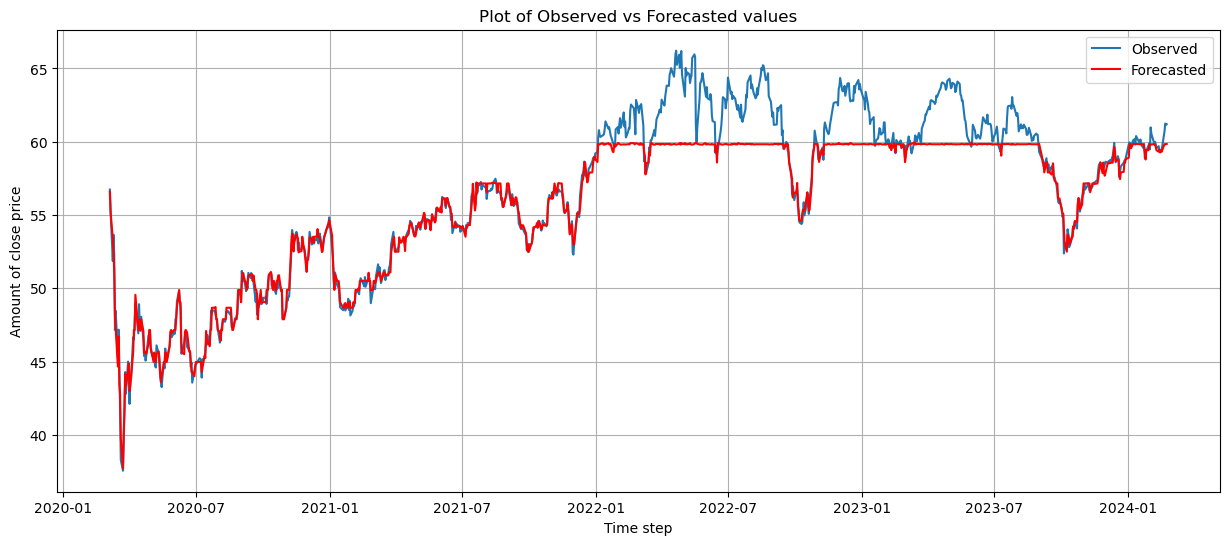

In [22]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_2['close'], label='Observed')
plt.plot(combined_2[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [23]:
#add additional predictors to the model
#calculate the mean close price in certain days and  find the ratio between today's closing price and that of the periods
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data[ratio_column] = data["close"] / rolling_averages["close"]
    
    trend_column = f"Trend_{horizon}"
    data[trend_column] = data.shift(1).rolling(horizon).sum()["close"]
    
    
    
    new_predictors+= [ratio_column, trend_column]

In [24]:
data['mom'] = data['close'].pct_change(12) # 12 month change

In [25]:
#Create the RSI indicator
#data['rsi' + str(n)] = talib.RSI(data['close'].values, timeperiod=horizon)
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [26]:
data['RSI']= computeRSI(data['close'], 14)

In [27]:
data.head()

,open,high,low,close,volume,Tomorrow,previousday,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,mom,RSI
date,,,,,,,,,,,,,,,,,,,
1994-02-25,10.50000,10.59375,10.46875,10.50000,5167600,10.65625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-02-28,10.53125,10.81250,10.53125,10.65625,6970400,10.59375,10.50000,1.007386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-01,10.65625,10.71875,10.53125,10.59375,6560400,10.53125,10.65625,0.997059,21.15625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-02,10.59375,10.59375,10.46875,10.53125,6402400,10.40625,10.59375,0.997041,21.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994-03-03,10.53125,10.53125,10.37500,10.40625,4341600,10.40625,10.53125,0.994030,21.12500,0.987544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
data.shape 

(7551, 19)

In [29]:
new_data=data[new_predictors]
new_data['close']=data['close']
new_data['MOM']=data['mom']
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM
date,,,,,,,,,,,,
1994-02-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.50000,NaN
1994-02-28,1.007386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.65625,NaN
1994-03-01,0.997059,21.15625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.59375,NaN
1994-03-02,0.997041,21.25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.53125,NaN
1994-03-03,0.994030,21.12500,0.987544,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.40625,NaN


In [30]:
new_data['SMA_3'] = new_data.iloc[:,10].rolling(window=3).mean()
new_data['SMA_4'] = new_data.iloc[:,10].rolling(window=4).mean()

In [31]:
new_data['CMA_4'] = new_data['close'].expanding(min_periods=4).mean()

In [32]:
new_data['EMA'] = new_data.iloc[:,10].ewm(span=40,adjust=False).mean()

In [33]:
new_data=new_data.dropna()
new_data.shape 

(6551, 16)

In [34]:
new_data.head()

,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000,close,MOM,SMA_3,SMA_4,CMA_4,EMA
date,,,,,,,,,,,,,,,,
1998-02-11,1.006852,67.65625,1.016043,168.56250,1.061265,1941.25000,1.088479,7905.609375,1.638872,20988.992188,34.43750,0.092170,34.031250,33.921875,21.002427,32.721472
1998-02-12,1.002715,68.40625,1.016514,169.46875,1.063850,1946.96875,1.093809,7909.546875,1.645918,21012.929688,34.62500,0.094862,34.343750,34.179688,21.016023,32.814327
1998-02-13,0.995011,69.06250,1.002376,170.31250,1.050884,1952.81250,1.082467,7913.859375,1.627744,21036.898438,34.28125,0.069201,34.447917,34.328125,21.029248,32.885885
1998-02-17,0.999544,68.90625,0.998179,171.00000,1.047584,1957.28125,1.081036,7917.390625,1.624431,21060.585938,34.25000,0.057915,34.385417,34.398438,21.042416,32.952427
1998-02-18,1.004541,68.53125,1.003812,171.56250,1.055260,1961.65625,1.090358,7920.640625,1.637377,21084.304688,34.56250,0.067568,34.364583,34.429688,21.055869,33.030967


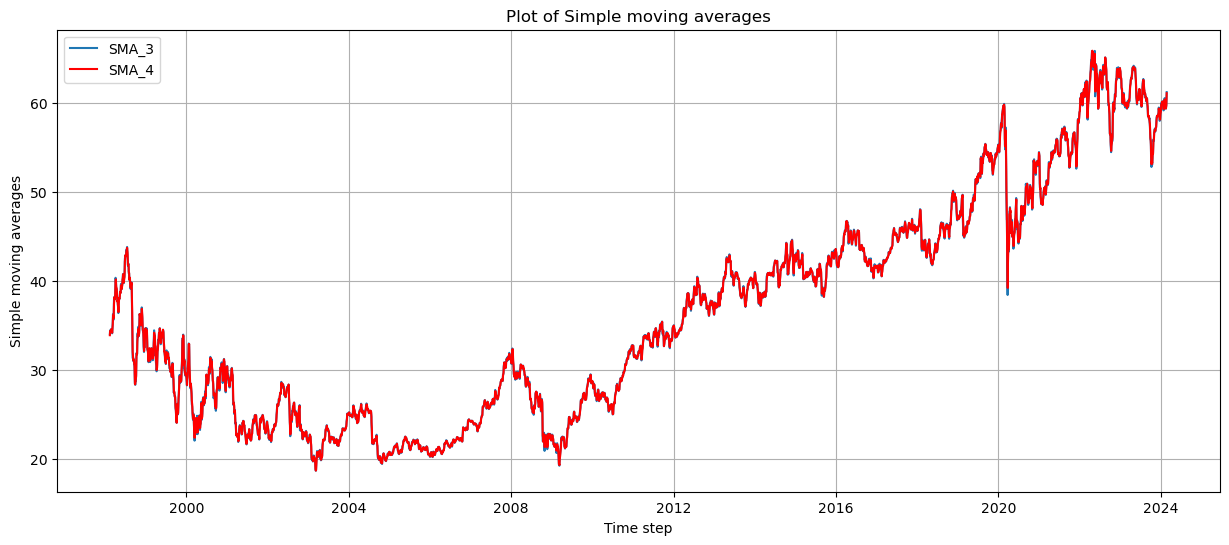

In [35]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['SMA_3'], label='SMA_3')
plt.plot(new_data['SMA_4'], color='r', label='SMA_4')
plt.title('Plot of Simple moving averages')
plt.ylabel('Simple moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

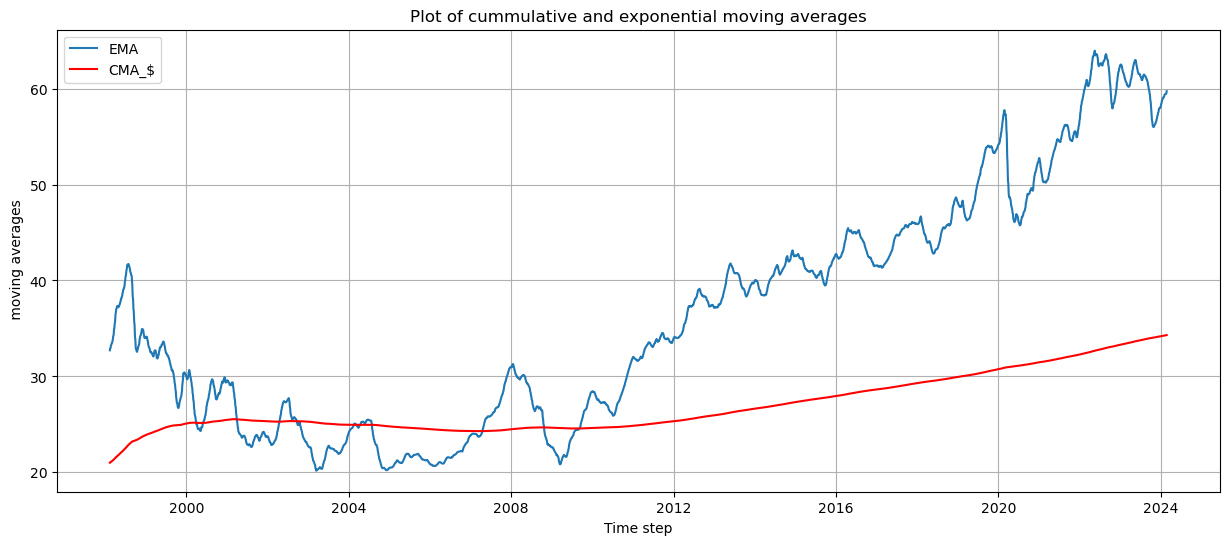

In [36]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['EMA'], label='EMA')
plt.plot(new_data['CMA_4'], color='r', label='CMA_$')
plt.title('Plot of cummulative and exponential moving averages')
plt.ylabel(' moving averages')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

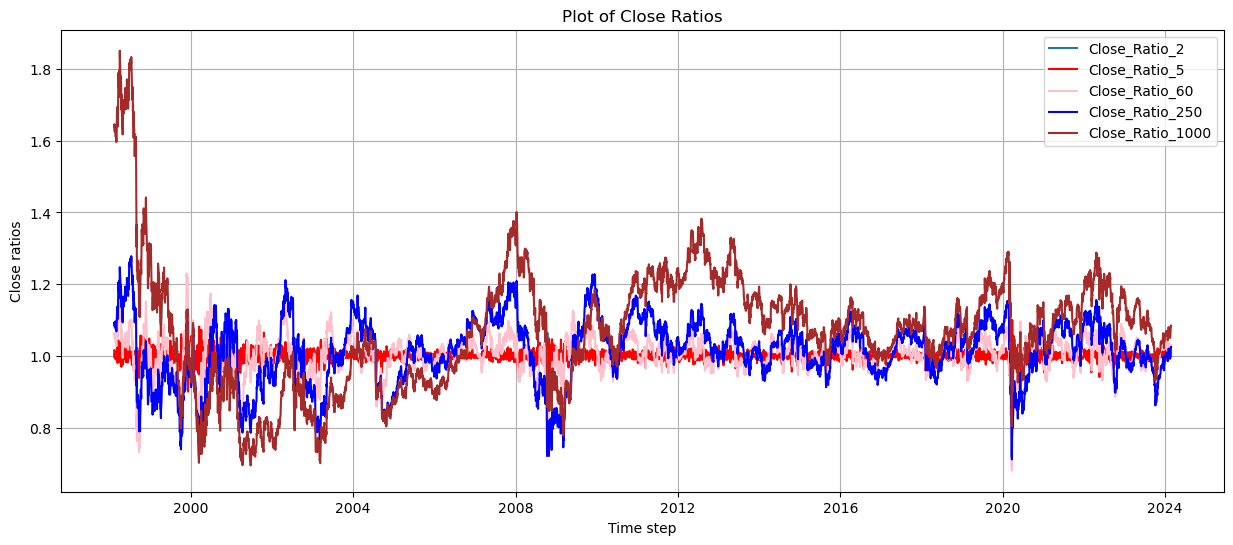

In [37]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Close_Ratio_2'], label='Close_Ratio_2')
plt.plot(new_data['Close_Ratio_5'], color='r', label='Close_Ratio_5')
plt.plot(new_data['Close_Ratio_60'], color='pink', label='Close_Ratio_60')
plt.plot(new_data['Close_Ratio_250'], color='b', label='Close_Ratio_250')
plt.plot(new_data['Close_Ratio_1000'], color='brown', label='Close_Ratio_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

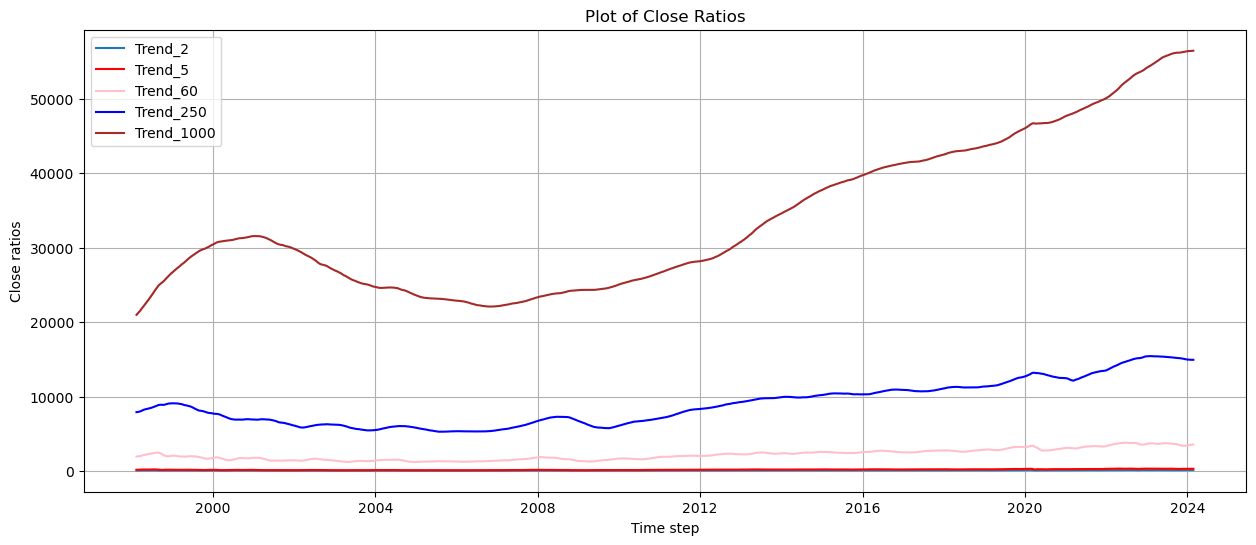

In [38]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['Trend_2'], label='Trend_2')
plt.plot(new_data['Trend_5'], color='r', label='Trend_5')
plt.plot(new_data['Trend_60'], color='pink', label='Trend_60')
plt.plot(new_data['Trend_250'], color='b', label='Trend_250')
plt.plot(new_data['Trend_1000'], color='brown', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Close Ratios')
plt.ylabel('Close ratios')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [39]:
new_data['RSI']=data['RSI']
new_data['previousday']=data['previousday']

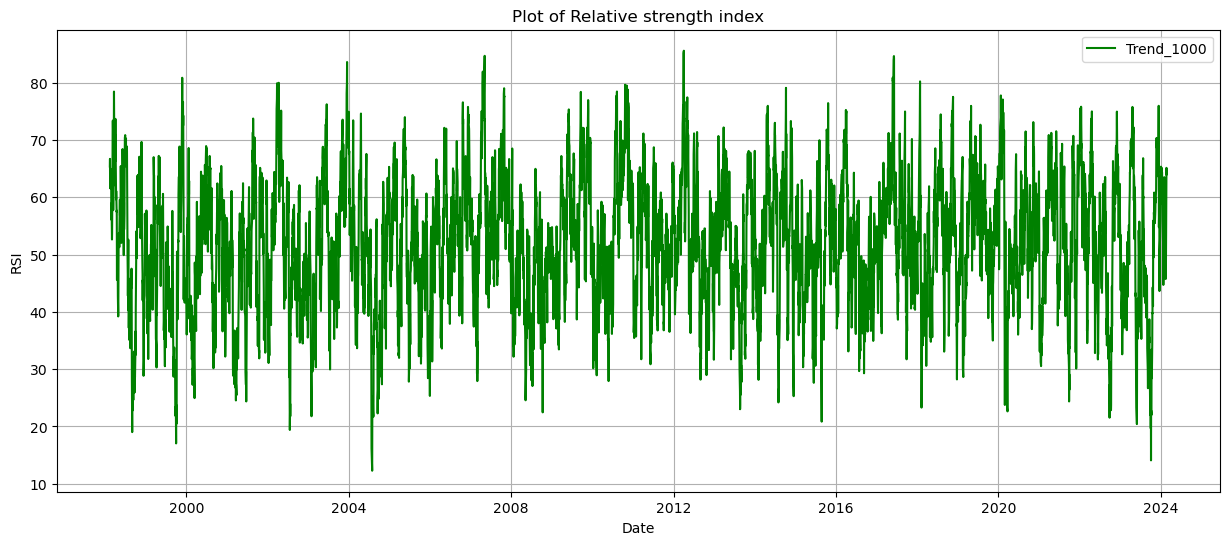

In [40]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['RSI'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Relative strength index')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

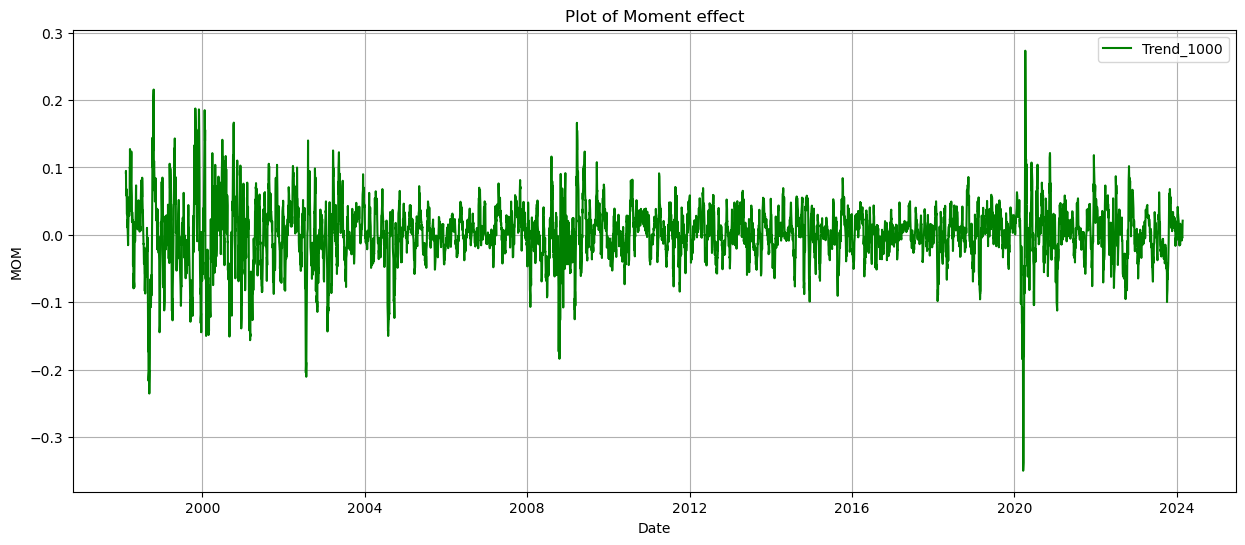

In [41]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(new_data['MOM'], color='g', label='Trend_1000')
#plt.plot(new_data['close'], color='g', label='Close_Ratio_2')
plt.title('Plot of Moment effect')
plt.ylabel('MOM')
plt.xlabel('Date')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [42]:
train = new_data.iloc[:-1000]
test = new_data.iloc[-1000:]

In [43]:
train.shape

(5551, 18)

In [44]:
new_data.columns

Index(['Close_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Trend_5',
       'Close_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Trend_250',
       'Close_Ratio_1000', 'Trend_1000', 'close', 'MOM', 'SMA_3', 'SMA_4',
       'CMA_4', 'EMA', 'RSI', 'previousday'],
      dtype='object')

In [45]:
predictors= ['SMA_3','SMA_4','EMA','RSI','MOM', 'previousday'] 

#### Retrain the models on the new predictors

In [46]:
# creating a dictionary of Regressors to be experimented on.
models_dict = {
          'RF Regressor':RandomForestRegressor(random_state=0),
          'xgboost': XGBRegressor(),'Gradient Boost': GradientBoostingRegressor(random_state=0),
    'Catboostregressor':CatBoostRegressor(iterations=100, early_stopping_rounds=50)
         }

#looping through all the regressors, fitting and evaluating them on Cross validation and test data respectively
for key, model in models_dict.items():
    model.fit(train[predictors], train['close'])
    print(f'Performance of "{key}" on  Test set:')
    print('=='*28)
    print ( 'Test set:')
    print("**"*8)
    evaluate_model(model,test[predictors], test['close'])

Performance of "RF Regressor" on  Test set:
Test set:
****************
MAE: 1.13
MAPE: 0.02
minae: 0.00
maxae: 6.37
medae: 0.49

Performance of "xgboost" on  Test set:
Test set:
****************
MAE: 1.66
MAPE: 0.03
minae: 0.00
maxae: 7.41
medae: 1.00

Performance of "Gradient Boost" on  Test set:
Test set:
****************
MAE: 1.39
MAPE: 0.02
minae: 0.00
maxae: 6.72
medae: 0.69

Learning rate set to 0.348972
0:	learn: 6.3068359	total: 3.43ms	remaining: 340ms
1:	learn: 4.2077930	total: 6.33ms	remaining: 310ms
2:	learn: 2.8773744	total: 9.71ms	remaining: 314ms
3:	learn: 2.0060012	total: 13.3ms	remaining: 318ms
4:	learn: 1.4278706	total: 16.8ms	remaining: 319ms
5:	learn: 1.0648165	total: 20.1ms	remaining: 315ms
6:	learn: 0.8412219	total: 23.1ms	remaining: 307ms
7:	learn: 0.7026525	total: 26.3ms	remaining: 302ms
8:	learn: 0.6291315	total: 29.4ms	remaining: 297ms
9:	learn: 0.5770346	total: 32.6ms	remaining: 293ms
10:	learn: 0.5500005	total: 36.4ms	remaining: 295ms
11:	learn: 0.5295285	tot

#### Improving the model

In [47]:
#model_1 = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)
#n_estimators=200, min_samples_split=50, random_state=1
model_2= GradientBoostingRegressor(random_state=0)

def predict(train, test, predictors_1, model_1):
    model_1.fit(train[predictors_1], train["Target"])
    preds_1 = model_1.predict_proba(test[predictors_1])[:,1]
    preds_1[preds_1 >=.6] = 1
    preds_1[preds_1 <.6] = 0
    preds_1 = pd.Series(preds_1, index=test.index, name="Predictions_1")
    combined_1 = pd.concat([test["Target"], preds_1], axis=1)
    return combined_1 

In [48]:
def predict(train, test, predictors, model_2):
    model_2.fit(train[predictors], train["close"])
    preds_2 = model_2.predict(test[predictors])
    preds_2 = pd.Series(preds_2, index=test.index, name="Predictions_2")
    combined_2 = pd.concat([test["close"], preds_2], axis=1)
    return combined_2

In [49]:
def backtest(new_data, model_2, predictors, start=1500, step=250):
    all_predictions = []

    for i in range(start, new_data.shape[0], step):
        train = new_data.iloc[0:i].copy()
        test = new_data.iloc[i:(i+step)].copy()
        predictions_2 = predict(train, test, predictors, model_2)
        all_predictions.append(predictions_2)
    
    return pd.concat(all_predictions)

In [50]:
predictions_2 = backtest(new_data, model_2, predictors)

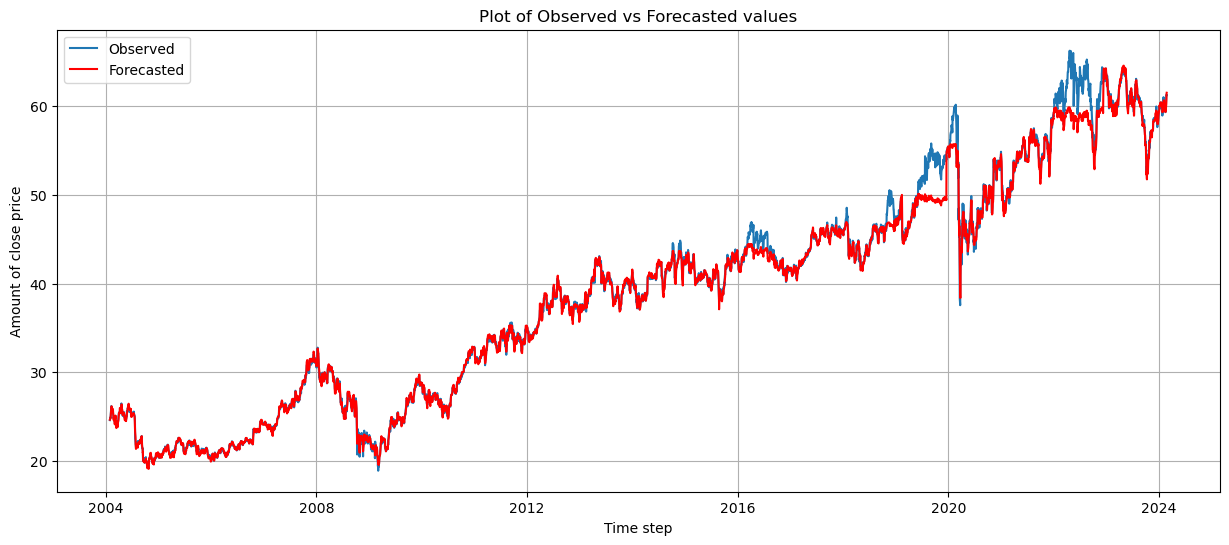

In [51]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(predictions_2['close'], label='Observed')
plt.plot(predictions_2['Predictions_2'], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

In [52]:
model_2.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [53]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [54]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.03121980548749776

mean absolute  error is : 1.8691078393311626



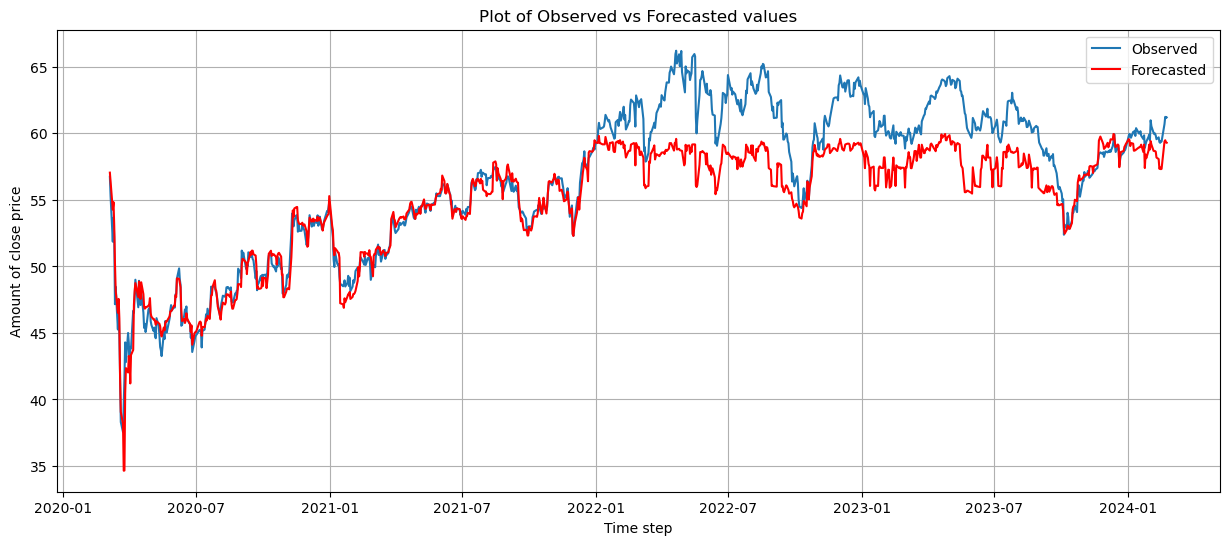

In [55]:
# Plot the test predictions and true values
pred= pd.Series(prediction, index=test.index)
plt.figure(figsize=(15,6))
plt.plot(test['close'], label='Observed')
plt.plot(pred, color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

#### Perform Hyper parameter tuning using grid searchcv

#possibe hyperparameters for random forest
hyper = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 6]
}

from sklearn.model_selection import GridSearchCV

cv_model= GridSearchCV(GradientBoostingRegressor(), param_grid=hyper)
cv_model.fit(train[predictors], train['close'])

print(cv_model.best_score_)
print(cv_model.best_estimator_)

In [56]:
model = GradientBoostingRegressor(max_depth=5, n_estimators=100, learning_rate=0.1, min_samples_split=5)
model.fit(train[predictors], train['close'])
prediction=model.predict(test[predictors])

In [57]:
grdb_mae =  mean_absolute_error(test['close'], prediction)
abs_errors= np.abs(np.array(prediction) - np.array(test['close']))
grdb_min_abs_errors= np.min(abs_errors)
grdb_max_abs_errors= np.max(abs_errors)
grdb_med_abs_errors= np.median(abs_errors)
grdb_mape = mean_absolute_percentage_error(test['close'], prediction)

In [58]:
print(f"Optimized Gradient boosting Performance Metrics \n\n \
gradientboost Mae: {grdb_mae} \n \
gradientboost minae: {grdb_min_abs_errors} \n \
gradientboost maxae: {grdb_max_abs_errors} \n \
gradientboost medae: {grdb_med_abs_errors} \n \
gradientboost Mape: {grdb_mape} \n \
 \n\n <-------------------------------------------------->\n")

Optimized Gradient boosting Performance Metrics 

 gradientboost Mae: 1.4112610597267288 
 gradientboost minae: 0.0001655960980642135 
 gradientboost maxae: 6.660727193518731 
 gradientboost medae: 0.6964384710161013 
 gradientboost Mape: 0.023391526185625258 
  

 <-------------------------------------------------->



In [59]:
pred= pd.Series(prediction, index=test.index)
combined= pd.concat([test['close'], pred],axis=1)
combined 

,close,0
date,,
2020-03-05,56.740002,57.603538
2020-03-06,55.259998,56.984131
2020-03-09,51.860001,53.947868
2020-03-10,53.660000,54.057609
2020-03-11,52.209999,52.339484
...,...,...
2024-02-16,59.389999,58.578072
2024-02-20,60.700001,59.415085
2024-02-21,61.240002,59.356503


In [60]:
mape= mean_absolute_percentage_error(test['close'], prediction)
mae=mean_absolute_error(test['close'], prediction)

In [61]:
print('mean absolute percentage error is : {}\n'.format(mape))
print('mean absolute  error is : {}\n'.format(mae))

mean absolute percentage error is : 0.023391526185625258

mean absolute  error is : 1.4112610597267288



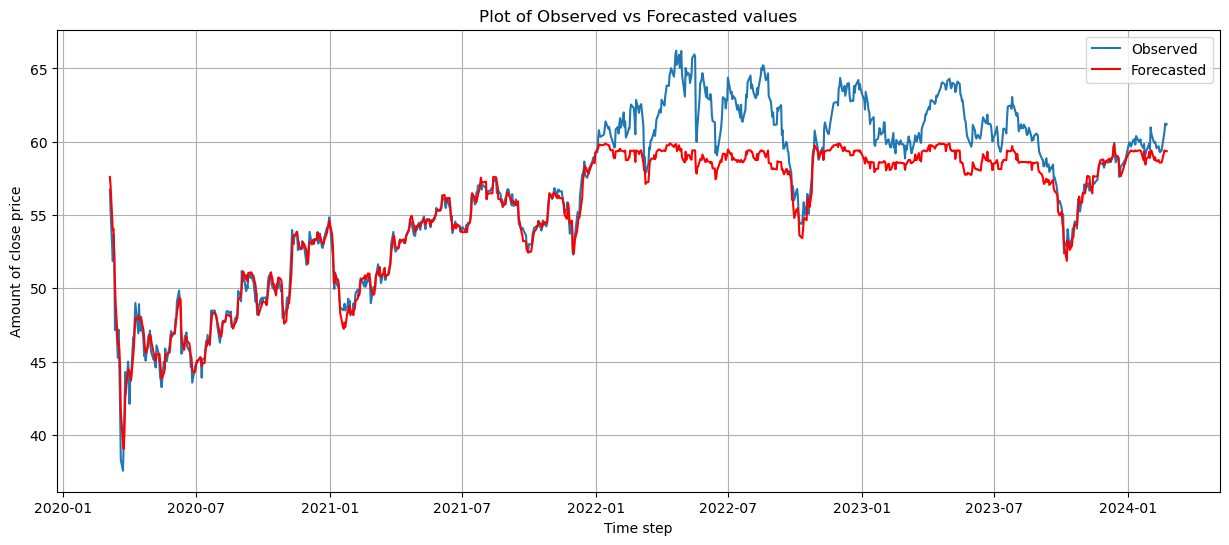

In [62]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined['close'], label='Observed')
plt.plot(combined[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

### Stacking and Bagging

In [63]:
# List of machine learning algorithms to consider
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet 
algorithms = [
    ('Linear regression', LinearRegression(), {}),
    ('Ridge', Ridge(), {}),
    ('Lasso', Lasso(), {}),
    ('Elastic Net', ElasticNet(), {}),
    #('SVM', SVC(kernel='linear', probability=True, decision_function_shape='ovr'), {}),
    ('MLP', MLPRegressor(), {})
]

# Train base models
base_models = {}
for algorithm_name, algorithm, _ in algorithms:
    print(algorithm)
    model = algorithm
    model.fit(train[predictors], train['close'])
    base_models[algorithm_name] = model

eval_metrics = ['mae', 'mape']
results = pd.DataFrame(columns=['Algorithm'] + eval_metrics)

for algorithm_name, model in base_models.items():
    y_pred = model.predict(test[predictors])
    mae= mean_absolute_error(test['close'], y_pred)
    mape =mean_absolute_percentage_error(test['close'], y_pred)

# Ensembling using Bagging with all base models
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)
bagging_model.fit(train[predictors], train['close'])
bagging_y_pred = bagging_model.predict(test[predictors])
bagging_mae = mean_absolute_error(test['close'], bagging_y_pred)
abs_errors= np.abs(np.array(bagging_y_pred) - np.array(test['close']))
bagg_min_abs_errors= np.min(abs_errors)
bagg_max_abs_errors= np.max(abs_errors)
bagg_med_abs_errors= np.median(abs_errors)
bagging_mape = mean_absolute_percentage_error(test['close'], bagging_y_pred)
print(f"Bagging Ensemble Method Performance Metrics \n\n \
bagging Mae: {bagging_mae} \n \
bagging minae: {bagg_min_abs_errors} \n \
bagging maxae: {bagg_max_abs_errors} \n \
bagging medae: {bagg_med_abs_errors} \n \
bagging Mape: {bagging_mape} \n \
 \n\n <-------------------------------------------------->\n")

# Ensembling using Stacking
meta_model = Ridge()
stacking_model = StackingRegressor(estimators=list(base_models.items()), final_estimator=meta_model)
stacking_model.fit(train[predictors], train['close'])
stacking_y_pred = stacking_model.predict(test[predictors])
stacking_mae =  mean_absolute_error(test['close'], stacking_y_pred)
abs_errors= np.abs(np.array(stacking_y_pred) - np.array(test['close']))
stack_min_abs_errors= np.min(abs_errors)
stack_max_abs_errors= np.max(abs_errors)
stack_med_abs_errors= np.median(abs_errors)
stacking_mape = mean_absolute_percentage_error(test['close'], stacking_y_pred)
print(f"Stacking Ensemble Method Performance Metrics \n\n \
stacking mae: {stacking_mae} \n \
stacking minae: {stack_min_abs_errors} \n \
stacking maxae: {stack_max_abs_errors} \n \
stacking medae: {stack_med_abs_errors} \n \
stacking mape: {stacking_mape} \n")




#print(f"Stacking F1 Score: {stacking_f1}")


LinearRegression()
Ridge()
Lasso()
ElasticNet()
MLPRegressor()
Bagging Ensemble Method Performance Metrics 

 bagging Mae: 1.2583867705000011 
 bagging minae: 1.0000000116860974e-07 
 bagging maxae: 6.687997599999996 
 bagging medae: 0.5749993000000018 
 bagging Mape: 0.020918086006294793 
  

 <-------------------------------------------------->

Stacking Ensemble Method Performance Metrics 

 stacking mae: 0.2671335870509688 
 stacking minae: 0.00023095343524204281 
 stacking maxae: 2.7295795729549823 
 stacking medae: 0.20308885887580885 
 stacking mape: 0.004892805920362289 



In [64]:
bagging_y_pred= pd.Series(bagging_y_pred, index=test.index)
stacking_y_pred= pd.Series(stacking_y_pred, index=test.index)

In [65]:
combined_stack= pd.concat([test['close'], stacking_y_pred],axis=1)
combined_bagg= pd.concat([test['close'], bagging_y_pred], axis=1)

In [66]:
combined_bagg

,close,0
date,,
2020-03-05,56.740002,58.067000
2020-03-06,55.259998,57.630999
2020-03-09,51.860001,54.802000
2020-03-10,53.660000,53.592000
2020-03-11,52.209999,53.301000
...,...,...
2024-02-16,59.389999,59.076001
2024-02-20,60.700001,59.384001
2024-02-21,61.240002,59.532001


In [67]:
combined_stack

,close,0
date,,
2020-03-05,56.740002,56.356258
2020-03-06,55.259998,57.040584
2020-03-09,51.860001,52.826240
2020-03-10,53.660000,53.880414
2020-03-11,52.209999,51.277621
...,...,...
2024-02-16,59.389999,59.237749
2024-02-20,60.700001,60.277499
2024-02-21,61.240002,60.590941


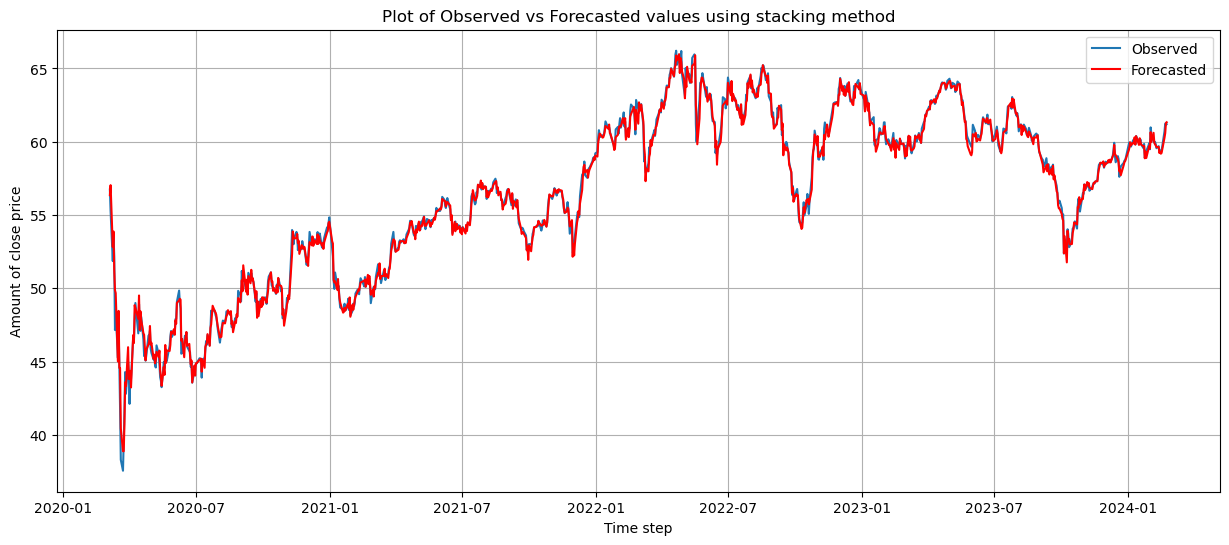

In [68]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_stack['close'], label='Observed')
plt.plot(combined_stack[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

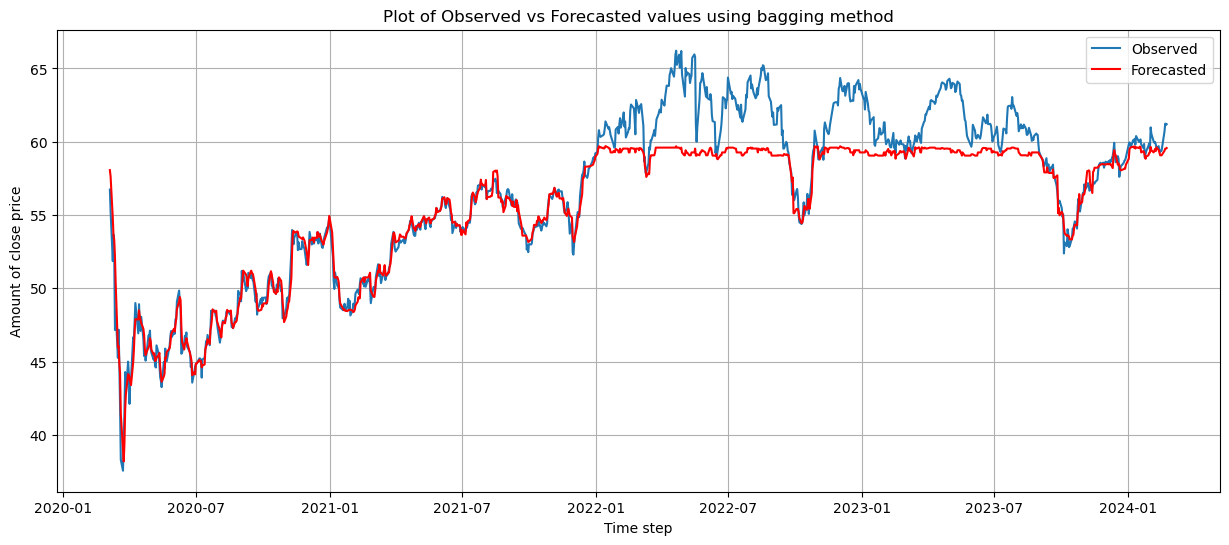

In [69]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='Forecasted')
plt.title('Plot of Observed vs Forecasted values using bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('forcast.png')
plt.show()

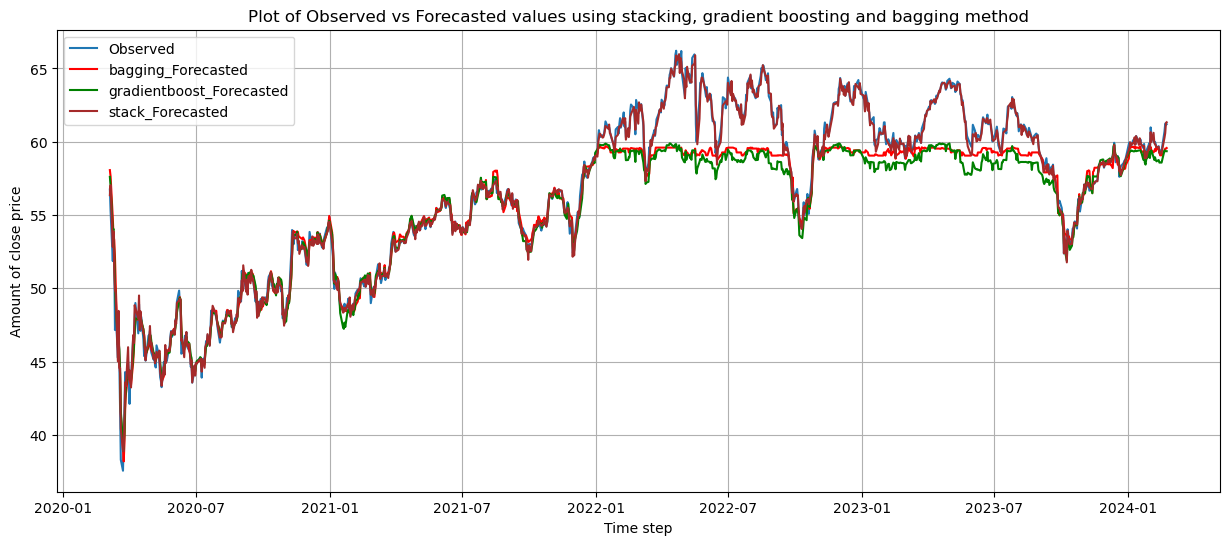

In [70]:
# Plot the test predictions and true values
plt.figure(figsize=(15,6))
plt.plot(combined_bagg['close'], label='Observed')
plt.plot(combined_bagg[0], color='r', label='bagging_Forecasted')
plt.plot(combined[0], color='green', label='gradientboost_Forecasted')
plt.plot(combined_stack[0], color='brown', label='stack_Forecasted')
plt.title('Plot of Observed vs Forecasted values using stacking, gradient boosting and bagging method')
plt.ylabel('Amount of close price')
plt.xlabel('Time step')
plt.legend()
plt.grid()
plt.savefig('cocacolaresult.png')
plt.show()

In [71]:
from prettytable import PrettyTable
import joblib
import os
# Constructing the result summary table containing the scores for each model on  test dataset.

task1_result = PrettyTable()
task1_result.field_names = ["Regressor", "MAE on Test","MAPE on Test", "MinAE on Test", "MaxAE on Test", "MedAE on Test"]
task1_result.add_row(['RF Reg', 1.13, 0.02, 0.00, 6.37, 0.49])
task1_result.add_row(['XGboost', 1.66, 0.03, 0.00, 7.41, 1.00])
task1_result.add_row(['GradientBoost', 1.39, 0.02, 0.00, 6.72, 0.69])
task1_result.add_row(['Catboost', 1.87, 0.03, 0.00, 7.49, 1.03])
task1_result.add_row(['Bagging', 1.26, 0.02, 1.00, 6.69, 0.57])
task1_result.add_row(['Stacking', 0.26, 0.00, 0.00, 2.81, 0.19])

print('Result Summary for All Regressors :')
print(task1_result)

Result Summary for All Regressors :
+---------------+-------------+--------------+---------------+---------------+---------------+
|   Regressor   | MAE on Test | MAPE on Test | MinAE on Test | MaxAE on Test | MedAE on Test |
+---------------+-------------+--------------+---------------+---------------+---------------+
|     RF Reg    |     1.13    |     0.02     |      0.0      |      6.37     |      0.49     |
|    XGboost    |     1.66    |     0.03     |      0.0      |      7.41     |      1.0      |
| GradientBoost |     1.39    |     0.02     |      0.0      |      6.72     |      0.69     |
|    Catboost   |     1.87    |     0.03     |      0.0      |      7.49     |      1.03     |
|    Bagging    |     1.26    |     0.02     |      1.0      |      6.69     |      0.57     |
|    Stacking   |     0.26    |     0.0      |      0.0      |      2.81     |      0.19     |
+---------------+-------------+--------------+---------------+---------------+---------------+
